In [227]:
from ucimlrepo import fetch_ucirepo 
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### 1. Coleta e preparação de dados

In [228]:
data = fetch_ucirepo(id=17)
X = data.data.features 
y = data.data.targets 
X.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [229]:
y.head()

,Diagnosis
0,M
1,M
2,M
3,M
4,M


In [230]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 2. Aplicação do K-Means

In [231]:
scores = []
k_values = range(2, 15)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, clusters)
    scores.append(score)
    
best_k = k_values[np.argmax(scores)]
print(f"Melhor valor de K: {best_k}")

Melhor valor de K: 2


In [ ]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

X['cluster'] = clusters

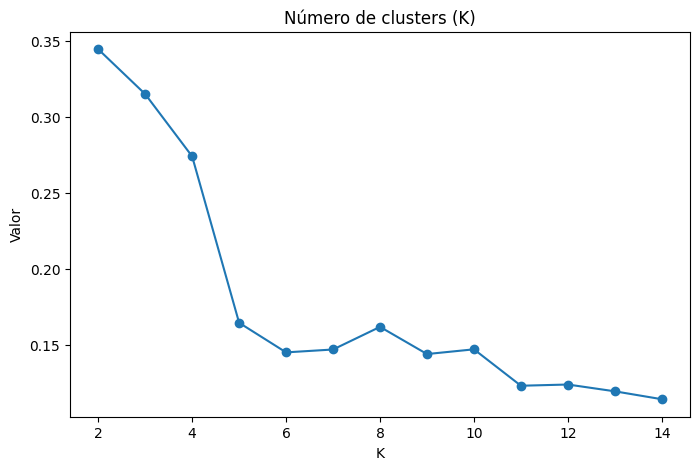

In [233]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, scores, marker='o')
plt.title("Número de clusters (K)")
plt.xlabel("K")
plt.ylabel("Valor")
plt.show()

### 3. Análise dos clusters

In [234]:
cluster_summary = X.groupby('cluster').mean()
print("Médias por cluster:\n")
print(cluster_summary)

Médias por cluster:

           radius1   texture1  perimeter1       area1  smoothness1  \
cluster                                                              
0        17.600702  21.403989  116.699840  997.632447     0.104610   
1        12.413378  18.246352   79.765906  485.766404     0.092289   

         compactness1  concavity1  concave_points1  symmetry1  \
cluster                                                         
0            0.157850    0.179992         0.094290   0.197689   
1            0.077938    0.043801         0.026532   0.173007   

         fractal_dimension1  ...    radius3   texture3  perimeter3  \
cluster                      ...                                     
0                  0.064415  ...  21.350319  28.852394   143.44266   
1                  0.062000  ...  13.761966  24.110472    89.40790   

               area3  smoothness3  compactness3  concavity3  concave_points3  \
cluster                                                                     

In [235]:
# Relação entre clusters e benignidade/malignidade
target_relation = pd.crosstab(X['cluster'], y['Diagnosis'], normalize='index')
print("\nRelação entre clusters e benignidade/malignidade:")
print(target_relation)


Relação entre clusters e benignidade/malignidade:
Diagnosis         B         M
cluster                      
0          0.069149  0.930851
1          0.902887  0.097113


### 4. Visualização dos resultados

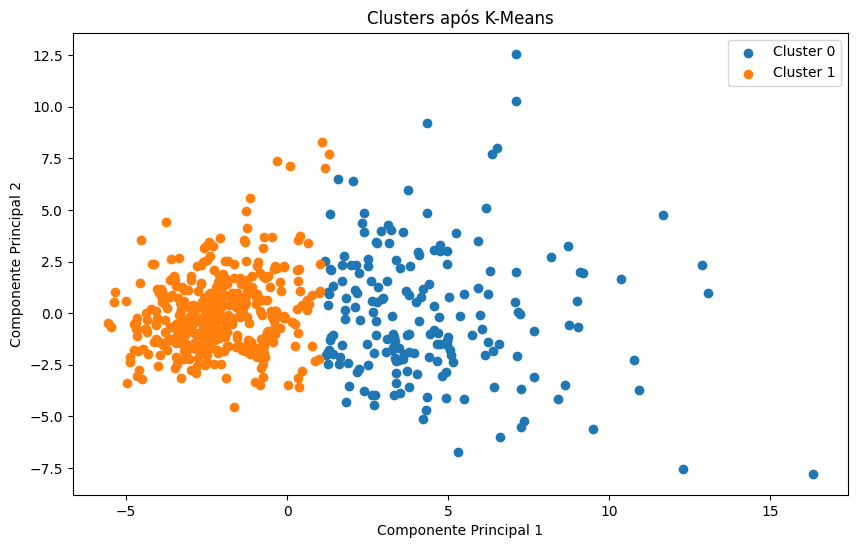

In [236]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
for cluster in range(best_k):
    plt.scatter(
        X_pca[X['cluster'] == cluster, 0], 
        X_pca[X['cluster'] == cluster, 1], 
        label=f"Cluster {cluster}"
    )
plt.title("Clusters após K-Means")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()